In [177]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Pokemon with stats

### `회귀분석을 통해 Attack 값 예측하기!`

# EDA START

## 1. 데이터의 도메인지식 파악하기

- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

- #: 각 포켓몬의 ID
- 이름 : 각 포켓몬의 이름
- 유형 1 : 각 포켓몬은 유형이 있습니다. 이것은 약점 / 공격에 대한 저항력을 결정합니다.
- 유형 2 : 일부 포켓몬은 듀얼 유형이며 2 개가 있습니다.
- 총계 : 이것 후에 오는 모든 통계의 합, 포켓몬이 얼마나 강한 지에 대한 일반적인 지침
- HP : 체력이나 체력으로 포켓몬이 실신하기 전에 얼마나 많은 피해를 입을 지 결정합니다.
- 어택 (Attack) : 일반 공격 (예 : 스크래치, 펀치)의 기본 수정 자.
- 방어 : 정상적인 공격에 대한 기본 피해 저항
- SP 공격 : 특수 공격, 특수 공격을위한 기본 수정 기호 (예 : 화재 폭발, 기포 빔)
- SP Def : 특수 공격에 대한 기본 데미지 저항
- 속도 : 매 라운드마다 어느 포켓몬을 공격할지 결정합니다.

In [178]:
pm_data = pd.read_csv('./Pokemon.csv', encoding='utf-8')

In [179]:
pm_data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


### 1.1. 데이터 개수, 타입 확인

In [180]:
pm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### 1.2. 각 데이터 개별 파악

> #### 1.2.1. #(아이디) : int

In [181]:
pm_data[pm_data['#'] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


- **'#' 아이디의 경우 한 종류에서 진화된 포켓몬은 같은 아이디를 가지고 있음을 알 수 있다.**

- 같은 아이디를 가지고 있는 데이터들이 어떠한 영향을 미치는지 확인할 필요 있다.

- 같은 아이디를 가지는 데이터들을 표시하기 위한 Evol 컬럼을 만들어주었다.

In [182]:
idx_id = pm_data.groupby("#")["#"].count() > 1

In [183]:
id_index = list((idx_id[idx_id == True]).index)

In [184]:
pm_data['Evol'] = False

In [185]:
pm_data.loc[2,"#"]

3

In [186]:
for i in range(len(pm_data)):
    if pm_data.loc[i,"#"] in id_index:
        pm_data.loc[i,'Evol'] = True
    else :
        pm_data.loc[i,'Evol'] = False

In [187]:
pm_data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evol
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,True
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,True
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,False


> #### 1.2.2. Name(포켓몬이름) : object

In [188]:
pm_name = pm_data.groupby("Name").apply(lambda x: x["Name"].unique()[0])
len(pm_data) == len(pm_name) #전체데이터 수와 name의 unique()적용한게 같다.

True

- Evol이 'True'인 값, 즉 '#' 값이 같은 것들은 Name 컬럼의 값이 일부분 중복된다.

- **Name_evol : **진화한 포켓몬의 경우 1,2,3 형태로 진화의 정도를 표시해 준다.

In [189]:
import math

In [190]:
def cal_evol_seq(dataFrame):
    for index, data in enumerate(dataFrame['#']):
        if index == 0:
            dataFrame.loc[index,"Name_evol"] = int(math.floor(0))
        else :
            if dataFrame.loc[index,'Evol'] == True:
                if data == dataFrame.loc[index-1,'#']:
                    if dataFrame.loc[index-1,'Name_evol'] == 1:
                        dataFrame.loc[index,"Name_evol"] = int(math.floor(2))
                    elif dataFrame.loc[index-1,'Name_evol'] == 2:
                        dataFrame.loc[index,"Name_evol"] = int(math.floor(3))
                    else:
                        dataFrame.loc[index,"Name_evol"] = int(math.floor(1))
                else:
                    dataFrame.loc[index,"Name_evol"] = int(math.floor(1))
            else:
                dataFrame.loc[index,"Name_evol"] = int(math.floor(0))
            

In [191]:
cal_evol_seq(pm_data)

In [192]:
pm_data.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evol,Name_evol
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,1.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,2.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False,0.0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,False,0.0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,True,1.0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,True,2.0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,True,3.0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,False,0.0


> #### 1.2.3. Type 1(포켓몬유형) : object

In [193]:
pm_type1 = pm_data.groupby("Type 1").apply(lambda x: x["Type 1"].unique()[0])
len(pm_type1)

18

- 유형은 18가지가 있음을 알수있다.

In [194]:
pm_data.groupby("Type 1")["Type 1"].count()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Type 1, dtype: int64

- 유형의 카테고리를 확인해보기

In [195]:
pm_data['Type 1'].str.isnumeric().value_counts()

False    800
Name: Type 1, dtype: int64

- numeric 값은 없음을 확인할 수 있다.

> #### 1.2.4. Type 2(포켓몬유형2) : object

- Type 2의 경우 다른 feature 들과 달리 800개가 아니라 414개의 데이터가 non-null임을 확인할 수 있다.

In [196]:
pm_data["Type 2"].isnull().head(10)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8    False
9     True
Name: Type 2, dtype: bool

In [197]:
pm_data["Type 2"].iloc[4]

nan

- null 데이터는 NaN 값임을 알 수 있다.

In [198]:
pm_type2 = pm_data.groupby("Type 2").apply(lambda x: x["Type 2"].unique()[0])
len(pm_type2)

18

In [199]:
pm_data.groupby("Type 2")["Type 2"].count()

Type 2
Bug          3
Dark        20
Dragon      18
Electric     6
Fairy       23
Fighting    26
Fire        12
Flying      97
Ghost       14
Grass       25
Ground      35
Ice         14
Normal       4
Poison      34
Psychic     33
Rock        14
Steel       22
Water       14
Name: Type 2, dtype: int64

- 속성 값의 Category 자체는 Type 1과 다르지 않으며 Type 1과 Type 2를 모두 가지고 있을 경우 듀얼 속성을 가지고 있다고 할 수 있다.

In [200]:
pm_data['Type 2'].str.isnumeric().value_counts()

False    414
Name: Type 2, dtype: int64

- numeric 값은 없음을 확인할 수 있다.

> #### 1.2.5. Total(총계) : int

- Total 값이 어디에 근거한 값인지 확인해보자. 

    + Total의 어감상 다른 수치(int) 데이터의 합계는 아닌지 확인해볼 필요가 있다.

In [201]:
total_bool = pm_data['Total'] ==  pm_data['HP'] + pm_data['Attack'] + pm_data['Defense'] + pm_data['Sp. Atk'] + pm_data['Sp. Def'] + pm_data['Speed']

In [202]:
for i in total_bool :
    if i != True :
        print('False')

- Total 값이 다른 수치데이터의 합계라는 것을 파악하였다.
- **Total 이 존재시 Attack 값은 자동적으로 계산되므로 이 회귀분석 모델에서 Total값을 제외하기로 한다.**

In [203]:
pm_data['Total'].mean()

435.1025

In [204]:
pm_data['Total'].max()

780

In [205]:
pm_data['Total'].min()

180

- 위의 값은 아래 수치데이터에서도 계속 확인할 것이므로 함수화 해놓는다.

In [206]:
def stat(column):
    print("[" + column + "] 평균:{}, 최대:{}, 최소:{}".format(pm_data[column].mean(), pm_data[column].max(),  pm_data[column].min()))

In [207]:
stat('Total')

[Total] 평균:435.1025, 최대:780, 최소:180


> #### 1.2.6. HP(체력) : int

In [208]:
stat('HP')

[HP] 평균:69.25875, 최대:255, 최소:1


- 최소 값이 '1' 인것이 조금 의아해서 HP 30미만의 데이터의 비율을 파악해보았다. 마찬가지로 아래에서 계속 사용할 것이므로 함수화 하였다.

In [209]:
def percentage(column, limit):
    print(len(pm_data[pm_data[column] < limit]) / len(pm_data) * 100)

In [210]:
percentage('HP', 30)

1.375


In [211]:
pm_data[pm_data['HP'] < 5]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evol,Name_evol
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False,False,0.0


- **HP 30 미만의 데이터가 1.38% 밖에 되지 않았다.**

> #### 1.2.7. Attack(체력) : int

In [212]:
stat('Attack')

[Attack] 평균:79.00125, 최대:190, 최소:5


In [213]:
percentage('Attack', 20)

0.75


- **Attack 20 미만의 데이터가 0.75% 밖에 되지 않았다.**

> #### 1.2.8. Defense(방어) : int

In [214]:
stat('Defense')

[Defense] 평균:73.8425, 최대:230, 최소:5


In [215]:
percentage('Defense', 20)

0.8750000000000001


- **Defense 20 미만의 데이터가 0.88% 밖에 되지 않았다.**

> #### 1.2.9. Sp. Atk(특수공격) : int

In [216]:
stat('Sp. Atk')

[Sp. Atk] 평균:72.82, 최대:194, 최소:10


In [217]:
percentage('Sp. Atk', 20)

0.8750000000000001


- **Sp. Atk 20 미만의 데이터가 0.88% 밖에 되지 않았다.**

> #### 1.2.10. Sp. Def(특수공격방어) : int

In [218]:
stat('Sp. Def')

[Sp. Def] 평균:71.9025, 최대:230, 최소:20


In [219]:
percentage('Sp. Def', 30)

2.25


- **Sp. Def 30 미만의 데이터가 2.25% 밖에 되지 않았다.**

> #### 1.2.11. Speed(속도) : int

In [220]:
stat('Speed')

[Speed] 평균:68.2775, 최대:180, 최소:5


In [221]:
percentage('Speed', 20)

1.7500000000000002


> #### 1.2.12. DualType(듀얼속성) : Object

- 듀얼속성(Type1, Type2)의 관계에 대해서 파악해보기

In [222]:
pm_onetype = pm_data[pm_data['Type 2'].isnull()]
pm_onetype.index

Int64Index([  4,   5,   9,  10,  11,  12,  13,  14,  24,  25,
            ...
            755, 762, 763, 770, 774, 775, 776, 788, 789, 792],
           dtype='int64', length=386)

In [223]:
pm_dualtype_index = (pm_data.index).difference(pm_onetype.index)

In [224]:
pm_dualtype = pm_data.iloc[pm_dualtype_index, :]
pm_dualtype.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evol,Name_evol
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,1.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,2.0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,True,1.0


In [225]:
pm_data['Type 2'].fillna(pm_data['Type 1'], inplace=True)

In [226]:
pm_data['Type 2'] = pm_data['Type 2'].astype(str)

In [227]:
pm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
Evol          800 non-null bool
Name_evol     800 non-null float64
dtypes: bool(2), float64(1), int64(9), object(3)
memory usage: 82.9+ KB


In [228]:
pm_data['Dual'] = True

In [229]:
for i in pm_data['Type 2']:
    if i == "missing" :
        pm_data['Dual'] == False
    else :
        pm_data['Dual'] == True

In [230]:
pm_data['Dual'] = pm_data[pm_data['Type 1'] == pm_data['Type 2']]['Dual'].replace(True,False)

In [231]:
pm_data['Dual'].fillna(True, inplace=True)

In [232]:
pm_data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evol,Name_evol,Dual
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False,0.0,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False,0.0,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,1.0,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,2.0,True
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False,False,0.0,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False,False,0.0,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,True,1.0,True
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,True,2.0,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,True,3.0,True
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False,False,0.0,False


> #### 1.2.13. Generation(세대) : int -> category

In [233]:
stat('Generation')

[Generation] 평균:3.32375, 최대:6, 최소:1


> #### 1.2.14. Legendary(전설적포켓몬) : bool

- 모든 포켓몬의 Total 평균

In [234]:
pm_data["Total"].mean()

435.1025

- Legendary가 아닌 포켓몬의 Total 평균

In [235]:
pm_data[pm_data["Legendary"] == False]["Total"].mean()

417.21360544217686

- Legendary 포켓몬의 Total 평균

In [236]:
pm_data[pm_data["Legendary"] == True]["Total"].mean()

637.3846153846154

- **Legendary 포켓몬의 경우 Total의 수치가 다른 포켓몬의 평균보다 월등히 높음을 알 수 있다.**

- Legendary 포켓몬의 경우 듀얼속성도 많이 가지는지 확인해보고 싶다.

In [237]:
pm_leg = pm_data[pm_data["Legendary"] == True]
len(pm_leg.index)

65

In [238]:
len(pm_leg[pm_leg['Type 2']=="missing"])

0

- **Legendary 포켓몬의 경우 Dual 속성을 가지는 포켓몬이 그렇지 않은 경우보다 더 많았다.**

### 1.3. null 데이터 확인

In [239]:
pm_data.isnull().any()

#             False
Name          False
Type 1        False
Type 2        False
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Evol          False
Name_evol     False
Dual          False
dtype: bool

- Type 2의 경우 듀얼 속성을 가지는 경우에만 값을 가진다. 위에서 확인한바 있다.

## 2. 컬럼들간의 관계 파악하기

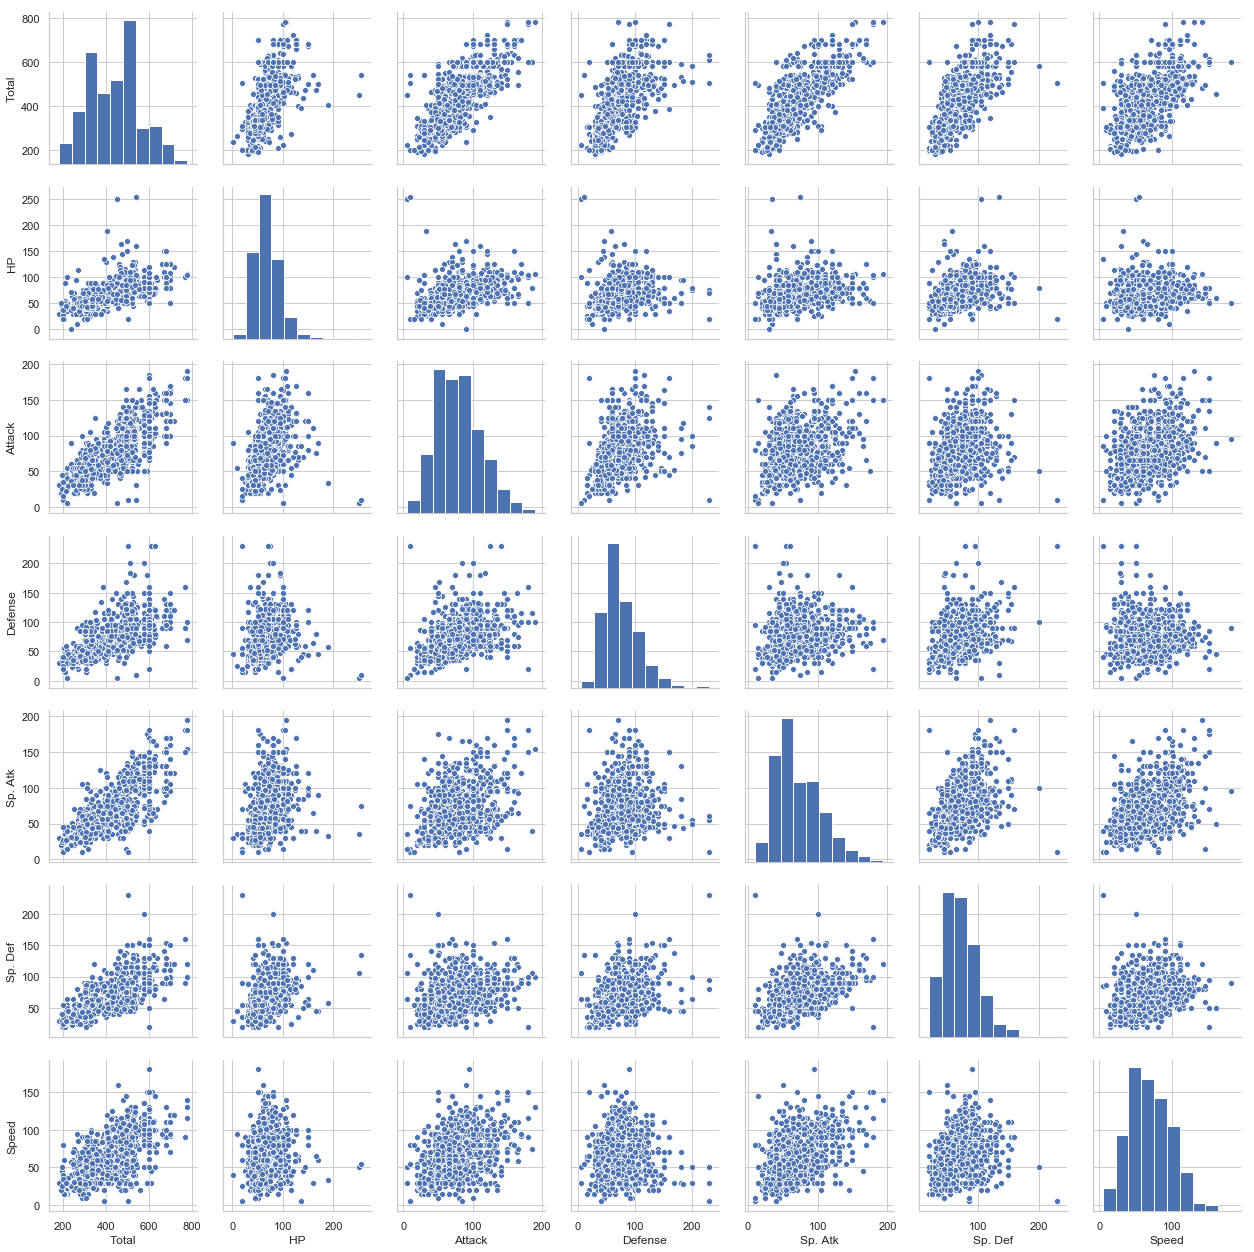

In [240]:
%matplotlib inline
cols = ["Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]
sns.pairplot(pm_data[cols])
plt.show()

- 대부분의 수치데이터가 Total과 양의 상관관계를 가지고 있음을 파악할 수 있다.

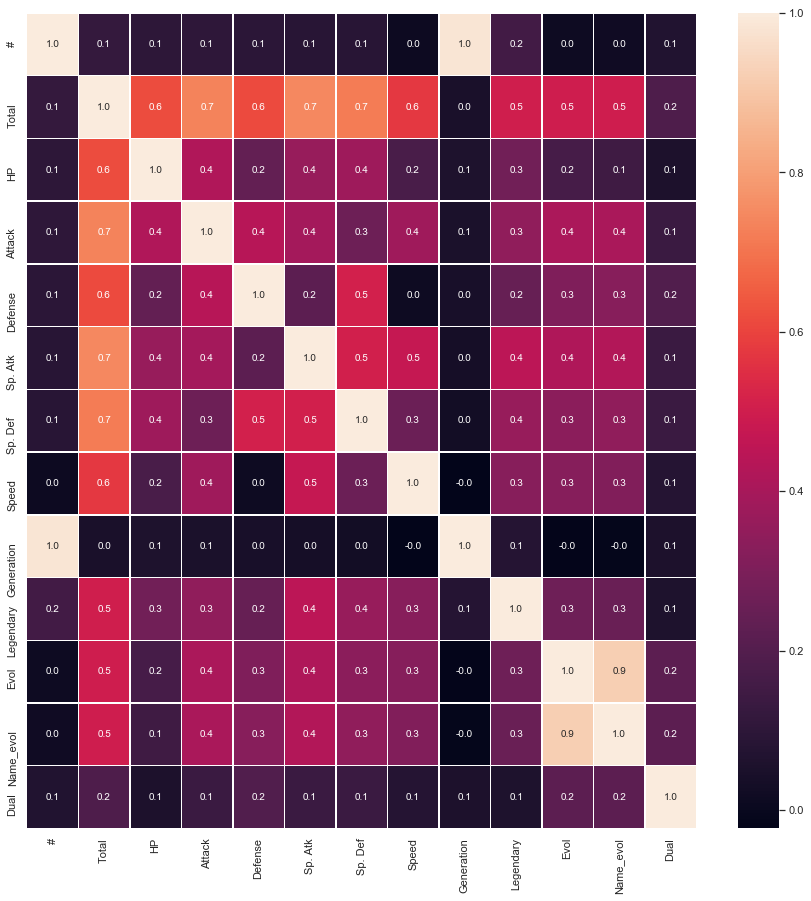

In [241]:
corr = pm_data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

In [242]:
# '-limit >= 상관계수 or limit <= 상관계수' 인 관계 추출 함수
def extract_corr(matrix_corr, limit):
    li_corr = [[row, col, matrix_corr.loc[row, col]]
                 for i, row in enumerate(matrix_corr.columns[:-2]) 
                 for col in matrix_corr.columns[i+1:-1] 
                 if np.abs(matrix_corr.loc[row, col]) >= limit]
    df_corr = pd.DataFrame(li_corr, columns=["Feature1", "Feature2", "corr"])
    df_corr.sort_values(by="corr", ascending=False, inplace=True)
    df_corr.reset_index(drop=True, inplace=True)
    return df_corr

In [243]:
df_corr = extract_corr(corr, 0.6)
df_corr

,Feature1,Feature2,corr
0,#,Generation,0.982516
1,Evol,Name_evol,0.920949
2,Total,Sp. Atk,0.747250
3,Total,Attack,0.736211
4,Total,Sp. Def,0.717609
5,Total,HP,0.618748
6,Total,Defense,0.612787


- Total은 다른 수치 feature들의 합계이므로 양의 상관관계가 있는 것이 이해되지만 #(아이디)와 Generation의 경우 0.98의 높은 corr가 나온다는 것이 이해되지 않는다.

- 두 데이터만 따로 확인해 보겠다.

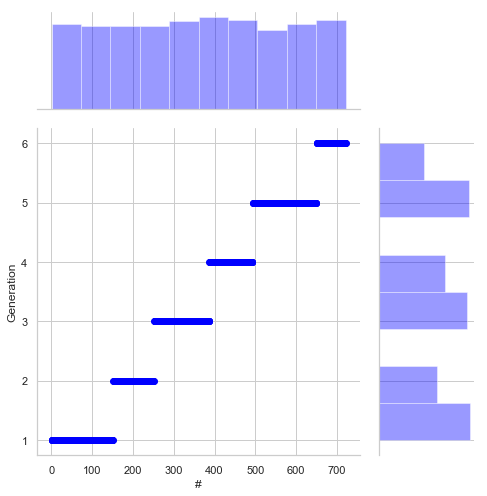

In [244]:
sns.jointplot(x="#", y="Generation", data=pm_data, height=7, ratio=3, color='blue')
plt.show()

- **그래프를 통해서 1세대에 약 100~200종류의 포켓몬이 새로 추가되었음을 알 수 있으며, 새로 추가되는 순서대로 #(아이디) 값이 늘어나므로 위와같은 corr 수치가 나왔음을 추측해볼 수 있다.**

### VIF

- 다중공산성을 확인하기 위하여 VIF 를 확인해보았다.

- 컬럼명 변경은 아래부분에서 해주고있지만 VIF를 위해 여기서 먼저 해주겠다.

In [245]:
pm_data = pm_data.rename(columns={'#': 'Id', 'Type 1': 'Type1', 'Type 2': 'Type2', 'Sp. Atk': 'Spatk', 'Sp. Def': 'Spdef'})

In [246]:
from patsy import dmatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [247]:
formula = "scale(Id) + scale(HP) + scale(Defense) + scale(Spatk) + scale(Spdef) + scale(Speed) + scale(Generation) + 0"
dfX = dmatrix(formula, pm_data, return_type="dataframe")

In [248]:
vif = pd.DataFrame(columns=["VIF Factor"])
for i in range(dfX.shape[1]):
    vif.loc[i] = variance_inflation_factor(dfX.values, i)
vif["features"] = dfX.columns

In [249]:
vif.sort_values(by="VIF Factor").reset_index(drop=True)

,VIF Factor,features
0,1.238083,scale(HP)
1,1.321772,scale(Speed)
2,1.428870,scale(Defense)
3,1.702689,scale(Spatk)
4,1.818655,scale(Spdef)
5,33.586286,scale(Generation)
6,33.981048,scale(Id)


- **VIF 결과 역시 Generation 과 id의 다중공산성이 높게 나온다.**

## 3. 데이터 컬럼 조정

### 3.1. 데이터 컬럼명 변경

- 모델을 정상적으로 돌리기 위해 컬럼명을 조정해 주겠다.

In [250]:
pm_data = pm_data.rename(columns={'#': 'Id', 'Type 1': 'Type1', 'Type 2': 'Type2', 'Sp. Atk': 'Spatk', 'Sp. Def': 'Spdef'})

In [251]:
pm_data.tail()

,Id,Name,Type1,Type2,Total,HP,Attack,Defense,Spatk,Spdef,Speed,Generation,Legendary,Evol,Name_evol,Dual
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,True,1.0,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,True,2.0,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,True,1.0,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,True,2.0,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,False,0.0,True


### 3.2. 데이터 컬럼타입 변경

- 메모리의 효율적인 사용과 모델 적용시 에러를 줄이기 위해 타입을 변경해준다.

In [252]:
pm_data["Type1"] = pm_data["Type1"].astype("category")

In [253]:
pm_data["Type2"] = pm_data["Type2"].astype("category")

In [254]:
pm_data["Generation"] = pm_data["Generation"].astype("category")

In [255]:
pm_data["Legendary"] = pm_data["Legendary"].astype("category")

In [260]:
pm_data["Name_evol"] = pm_data["Name_evol"].astype("category")

In [261]:
pm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
Id            800 non-null int64
Name          800 non-null object
Type1         800 non-null category
Type2         800 non-null category
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Spatk         800 non-null int64
Spdef         800 non-null int64
Speed         800 non-null int64
Generation    800 non-null category
Legendary     800 non-null category
Evol          800 non-null bool
Name_evol     800 non-null category
Dual          800 non-null bool
dtypes: bool(2), category(5), int64(8), object(1)
memory usage: 63.8+ KB


# 모델 돌려보기 START

## `원형의 모델`

- **Dual 컬럼의 경우 Type2 와 상호작용에 의해서 생겨난 컬럼이므로 C(Type2):Dual 를 추가해주었다. **

In [264]:
model_pm = sm.OLS.from_formula("Attack ~ scale(Id) + C(Type1) + C(Type2) + scale(HP) + scale(Defense) + scale(Spatk) + scale(Spdef) + scale(Speed) + C(Generation) + Legendary + Dual + Evol + scale(Name_evol) + C(Type2):Dual + 0", data=pm_data)
result_pm = model_pm.fit()
print(result_pm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     18.46
Date:                Fri, 11 Jan 2019   Prob (F-statistic):          7.29e-116
Time:                        00:37:17   Log-Likelihood:                -3526.9
No. Observations:                 800   AIC:                             7188.
Df Residuals:                     733   BIC:                             7502.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(Type

- **다중공산성이 높게 나왔던 Id와 Generation 중 Id 를 제거시 con.Number 값이 소폭 줄어들었음을 확인할 수 있다.**

In [265]:
model_pm = sm.OLS.from_formula("Attack ~C(Type1) + C(Type2) + scale(HP) + scale(Defense) + scale(Spatk) + scale(Spdef) + scale(Speed) + C(Generation) + Legendary + Dual + Evol + scale(Name_evol) + C(Type2):Dual + 0", data=pm_data)
result = model_pm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     18.52
Date:                Fri, 11 Jan 2019   Prob (F-statistic):          3.02e-115
Time:                        00:37:33   Log-Likelihood:                -3530.3
No. Observations:                 800   AIC:                             7193.
Df Residuals:                     734   BIC:                             7502.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(Type

## 4. 아웃라이어 파악하기

- 플로우 : Outlier 파악 -> Cooks Distance 파악

### 4.1. statsmodels를 이용한 표준화 잔차 계산

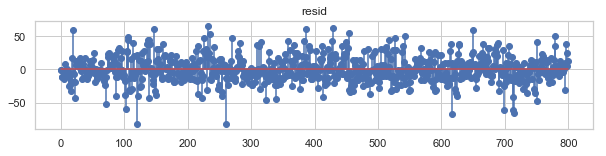

In [266]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title("resid")
plt.show()

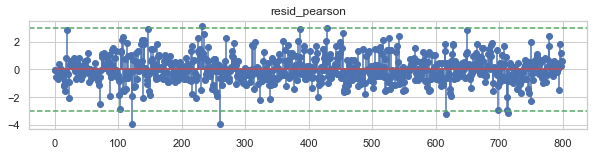

In [267]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("resid_pearson")
plt.show()

In [268]:
len(result.resid_pearson)

800

In [269]:
idx_resid1 = result.resid_pearson > 2.5
pm_data_resid1 = pm_data.iloc[idx_resid1 == True, :]
pm_data_resid1.index

Int64Index([19, 147, 232, 235, 387, 429, 454, 650], dtype='int64')

In [270]:
idx_resid2 = result.resid_pearson < -2.5
pm_data_resid2 = pm_data.iloc[idx_resid2 == True, :]
pm_data_resid2.index

Int64Index([103, 121, 261, 616, 699, 713, 714], dtype='int64')

In [271]:
outlier = []
outlier.extend(pm_data_resid1.index)
outlier.extend(pm_data_resid2.index)
outlier = list(set(outlier))
outlier

[387, 261, 454, 103, 232, 616, 650, 235, 713, 429, 714, 19, 147, 121, 699]

In [272]:
idx_surv = list(set(range(len(pm_data))).difference(outlier))

In [273]:
pm_data_del_out = pm_data.iloc[idx_surv, :].reset_index(drop=True)

In [274]:
len(pm_data_del_out)

785

In [275]:
model_outlier = sm.OLS.from_formula("Attack ~ C(Type1) + C(Type2) + scale(HP) + scale(Defense) + scale(Spatk) + scale(Spdef) + scale(Speed) + C(Generation) + Legendary + Dual + Evol + scale(Name_evol) + C(Type2):Dual + 0", data=pm_data_del_out)
result_outlier = model_outlier.fit()
print(result_outlier.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     23.30
Date:                Fri, 11 Jan 2019   Prob (F-statistic):          1.44e-136
Time:                        00:37:52   Log-Likelihood:                -3376.7
No. Observations:                 785   AIC:                             6885.
Df Residuals:                     719   BIC:                             7193.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(Type

### 4.2. Cook's Distance

- Cook's Distance 를 기준으로 아웃라이어와 레버리지를 동시에 고려한 데이터 파악

In [276]:
cook_influence_pm = result.get_influence()
cooks_d2, pvals = cook_influence_pm.cooks_distance
fox_cr = 4 / (len(pm_data_del_out) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

- Cook's Distance 를 기준으로 뽑아낸 row(아웃라이어+레버리지)를 제거

In [277]:
idx_surv = list(set(range(len(pm_data_del_out))).difference(idx))

In [278]:
pm_data_del_cook = pm_data_del_out.iloc[idx_surv, :].reset_index(drop=True)

In [279]:
model_cooks = sm.OLS.from_formula("Attack ~ C(Type1) + C(Type2) + scale(HP) + scale(Defense) + scale(Spatk) + scale(Spdef) + scale(Speed) + C(Generation) + Legendary + Dual + Evol + scale(Name_evol) + C(Type2):Dual + 0", data=pm_data_del_cook)
result_cooks = model_cooks.fit()
print(result_cooks.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     21.67
Date:                Fri, 11 Jan 2019   Prob (F-statistic):          4.60e-125
Time:                        00:38:08   Log-Likelihood:                -3150.0
No. Observations:                 734   AIC:                             6432.
Df Residuals:                     668   BIC:                             6736.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(Type

- R 스퀘어 값에는 크게 차이가 나지 않았다.

# Final K-Fold 교차검증

- 표본 내에서 성능검증을 하기위하여 K-Fold 교차 검증을 시행해 보았다.

In [280]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(pm_data_del_cook)):
    df_train = pm_data_del_cook.iloc[idx_train]
    df_test = pm_data_del_cook.iloc[idx_test]
    
    model_cooks = sm.OLS.from_formula("Attack ~ C(Type1) + C(Type2) + scale(HP) + scale(Defense) + scale(Spatk) + scale(Spdef) + scale(Speed) + C(Generation) + Legendary + Dual + Evol + scale(Name_evol) + C(Type2):Dual + 0", data=pm_data_del_cook)
    result_cooks = model_cooks.fit()
    
    pred = result_cooks.predict(df_test)
    rss = ((df_test.Attack - pred) ** 2).sum()
    tss = ((df_test.Attack - df_test.Attack.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result_cooks.rsquared, rsquared))

학습 R2 = 0.67833078, 검증 R2 = 0.72518069
학습 R2 = 0.67833078, 검증 R2 = 0.70868330
학습 R2 = 0.67833078, 검증 R2 = 0.66548999
학습 R2 = 0.67833078, 검증 R2 = 0.67939932
학습 R2 = 0.67833078, 검증 R2 = 0.57985263


In [281]:
scores.mean()

0.6717211878388318

- **학습 R2 보다 잘 나올때도 있고 안나올때도 있었다. 평균값은 학습 R2와 대체로 비슷함을 확인할 수 있으므로 과최적화는 피하였다.**

- **TODO 및 아쉬운점**
    + Type1 과 Type2 컬럼에 대해서 더 세분화해서 데이터를 뽑아 내었으면 좋았을것 같다.
        + 예를 들어 Type의 속성들에 대해서 하나하나 카테고리화 시킨다던지 조금 더 분석을 하면 좋은 결과가 나왔을 수도 있을것이다.
    + 수치데이터와 Lengendary 데이터 간의 관계를 더 명확히 분석했으면 더 좋은 결과가 나왔을 것 같다.
    + 모델 분석후 p value가 높게나온 유의하지 않은 카테고리 데이터들에 대해서 조치를 취할 수 있는 방법을 강구해야겠다.
    + 각 컬럼들에 대한 계수 값들에 대한 검증을 거쳐야했는데 하지 못하였다.